Pairs trading is supposedly one of the most popular types of trading strategy. In this strategy, usually a pair of stocks are traded in a market-neutral strategy, i.e. it doesn’t matter whether the market is trending upwards or downwards, the two open positions for each stock hedge against each other.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start = '2015-01-01'
end = '2020-07-01'
united_airline = get_pricing('UAL',start_date=start,end_date=end)
american_airline = get_pricing('AAL',start_date=start,end_date=end)

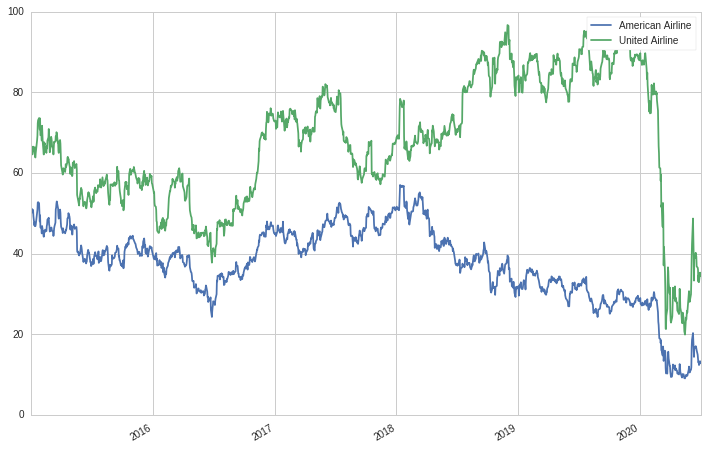

In [3]:
american_airline['close_price'].plot(label='American Airline',figsize=(12,8))
united_airline['close_price'].plot(label='United Airline')
plt.legend()

In [4]:
np.corrcoef(american_airline['close_price'],united_airline['close_price'])

array([[ 1.        ,  0.22840743],
       [ 0.22840743,  1.        ]])

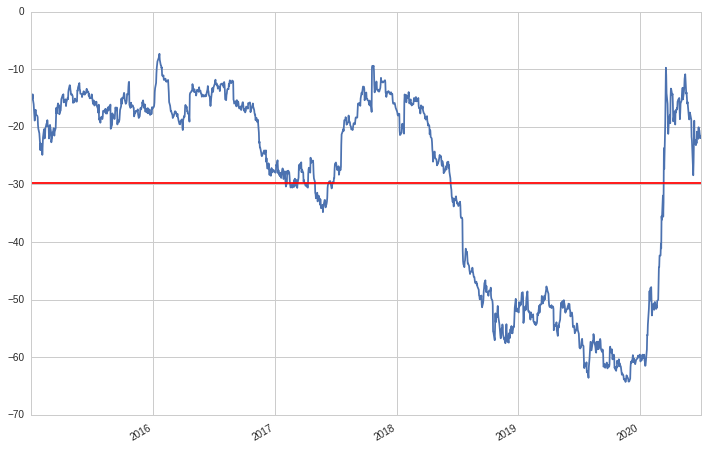

In [6]:
spread = american_airline['close_price'] - united_airline['close_price']
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')

### What is z-score?
Simply put, given a normal distribution of raw data points z-score is calculated so that the new distribution is a normal distribution with mean 0 and standard deviation of 1. Having such a distribution ~ N(0, 1) is very useful for creating threshold levels. For example, in pairs trading, we have a distribution of spread between the prices of stocks A and B. We can convert these raw scores of spread into z-scores as explained below. This new distribution will have mean 0 and standard deviation of 1. It is easy to create threshold levels for this distribution such as 1.5 sigma, 2 sigma, 2.5 sigma, and so on.

### How to calculate z-score?
z = (x – mean) / standard deviation, where x is a raw data point and z is the z-score.

Mean and standard deviation can be rolling statistics for a period of ‘t’ days or minutes or time intervals.

In [7]:
def zscore(stocks):
    return (stocks-stocks.mean()) / np.std(stocks)

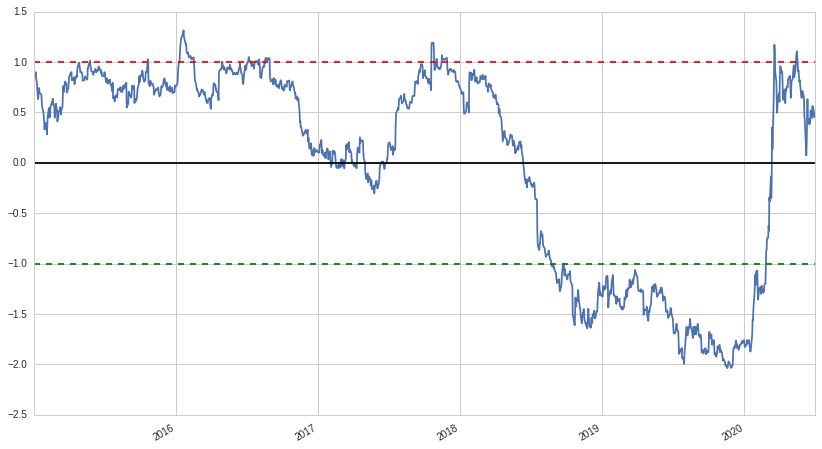

In [10]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(),color='black')
plt.axhline(1.0,c='r',ls='--')
plt.axhline(-1.0,c='g',ls='--')
# blue line: normalized spread

In [12]:
spread_mavg1 = spread.rolling(1).mean()
spread_mavg30 = spread.rolling(30).mean()
std_30 = spread.rolling(30).std()
zscore_30_1 = (spread_mavg1-spread_mavg30)/std_30

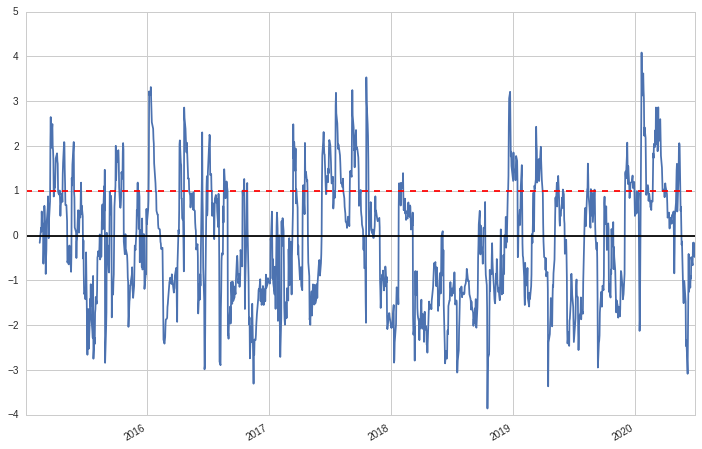

In [13]:
zscore_30_1.plot(figsize=(12,8),label='Rolling 30 Day Z score')
plt.axhline(0,color='black')
plt.axhline(1.0,color='red',ls='--')